In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
# Config

# seaborn
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

Resources:

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#5.-Getting-hard-core
https://www.kaggle.com/code/yasserh/uber-fare-prediction-comparing-best-ml-models#6b.-Ridge-Regression-Model
https://www.kaggle.com/code/satishgunjal/data-science-interview-questions-answers
https://blog.ml.cmu.edu/2020/08/31/2-data-exploration/<br>
PCA: https://www.youtube.com/watch?v=fkf4IBRSeEc&t=11s <br>
Markdown https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

# 0. Load data

In [6]:
df = pd.read_csv('uber.csv', index_col=0, parse_dates=["pickup_datetime"])
df.drop(columns=["key"], inplace=True)
df["categ"] = np.random.choice(["a", "b", "c"], size=len(df))
df["categ"] = df["categ"].astype("category")
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,categ
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,a
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,c
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,b
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,b
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,a
...,...,...,...,...,...,...,...,...
42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,a
16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,a
27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,b
20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,c


# 1. Handle types

Convert to optimized types whenever possible for optimized memory usage and commands. It can be a good idea to downcast ints and floats to occupy less memory. For example, an `age` column doesn't need more than int8). Unless the strings actually have a meaning, always convert an object category to something else, such as `float` or `category`.

For datetime columns, `parse_dates=True` in `pd.read_csv()` enables automatic inference of the types of datetime columns. Otherwise, use `df[col] = pd.to_datetime(df[col], format='') and specify the format. See [documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) about formats.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   categ              200000 non-null  category           
dtypes: category(1), datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.4 MB


In [8]:
numerical_features = list(df.select_dtypes(include='number').columns.values)
categorical_features = list(df.select_dtypes(include=["category"]).columns.values)
datetime_features = list(df.select_dtypes(include=["datetime", "datetime64", "datetime64[ns]", "datetimetz"]).columns.values)

assert len(set(df.columns) - set(numerical_features) - set(categorical_features) - set(datetime_features)) == 0

# 2. Univariate analysis

--------------------------------------------------
----------------NUMERICAL FEATURES----------------
--------------------------------------------------
Feature: fare_amount (dtype: float64)
Values in [-52.0; 499.0] -- missing: 0 (0.0%)
Mean: 11.359955250000002 +- 9.9017762250699
Percentile levels:    1%,    5%,   25%,   50%,   75%,   95%,   99%
Values:            3.30,   4.10,   6.00,   8.50,  12.50,  30.33,  53.30
Outliers using z-score (+-3): [-18.35; 41.07] (2.73% flags, not normally distributed: p=0.0)
Outliers using IQR (1.5): [-3.75; 22.25] (8.58% flags)


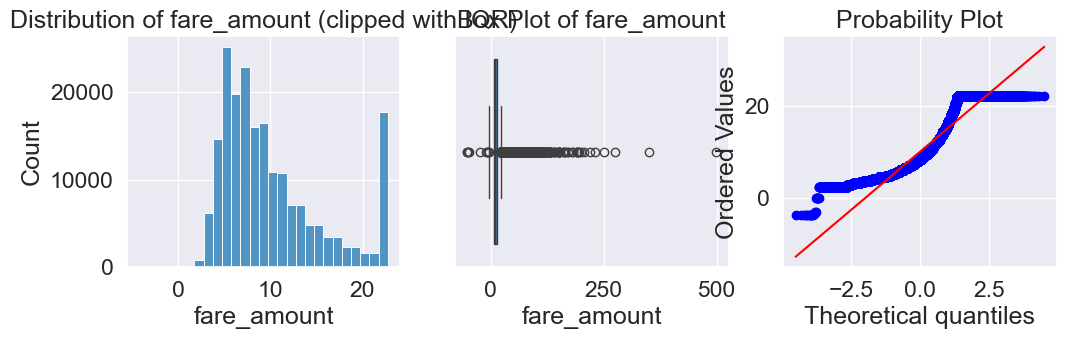


-------------------------------------------------

Feature: pickup_longitude (dtype: float64)
Values in [-1340.64841; 57.418457] -- missing: 0 (0.0%)
Mean: -72.5276379162372 +- 11.437787338931706
Percentile levels:    1%,    5%,   25%,   50%,   75%,   95%,   99%
Values:          -74.01, -74.01, -73.99, -73.98, -73.97, -73.87,   0.00
Outliers using z-score (+-3): [-106.84; -38.21] (1.97% flags, not normally distributed: p=0.0)
Outliers using IQR (1.5): [-74.02943224999999; -73.92978625000003] (6.78% flags)


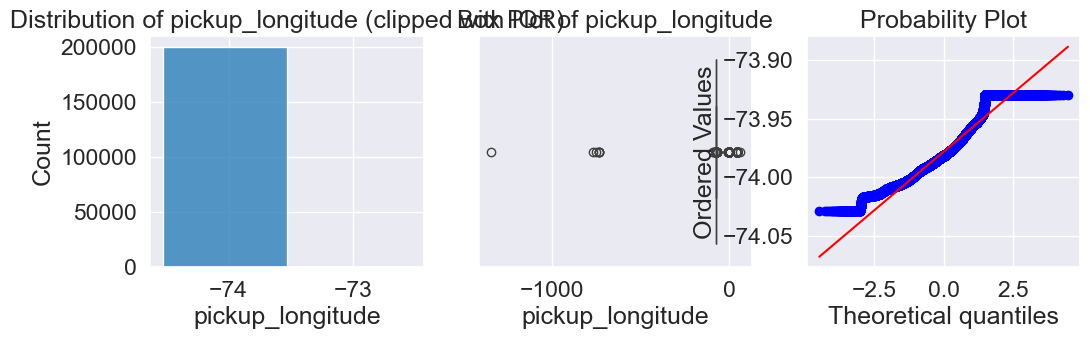


-------------------------------------------------

Feature: pickup_latitude (dtype: float64)
Values in [-74.01551500000001; 1644.421482] -- missing: 0 (0.0%)
Mean: 39.93588537801235 +- 7.720539407361821
Percentile levels:    1%,    5%,   25%,   50%,   75%,   95%,   99%
Values:            0.00,  40.70,  40.73,  40.75,  40.77,  40.79,  40.81
Outliers using z-score (+-3): [16.77; 63.10] (1.95% flags, not normally distributed: p=0.0)
Outliers using IQR (1.5): [40.68625237500001; 40.815701375] (4.71% flags)


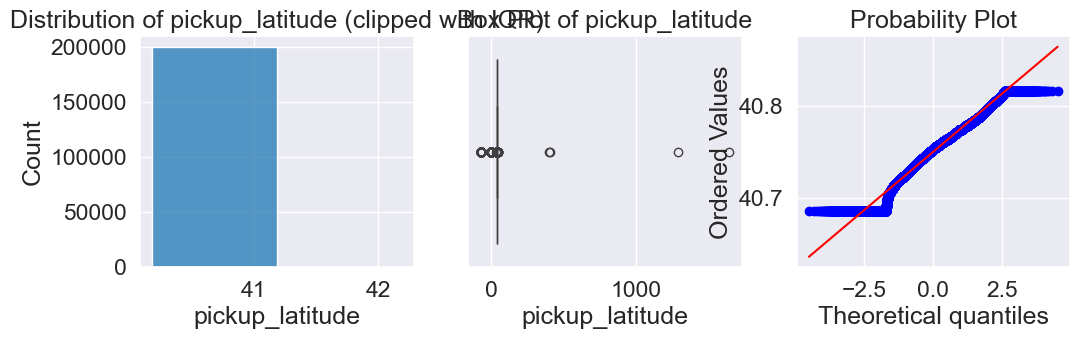


-------------------------------------------------

Feature: dropoff_longitude (dtype: float64)
Values in [-3356.6663; 1153.5726029999998] -- missing: 1 (0.0005000000000032756%)
Mean: -72.52529162747415 +- 13.117407778536663
Percentile levels:    1%,    5%,   25%,   50%,   75%,   95%,   99%
Values:          -74.02, -74.01, -73.99, -73.98, -73.96, -73.87,   0.00
Outliers using z-score (+-3): [-111.88; -33.17] (1.95% flags, not normally distributed: p=nan)
Outliers using IQR (1.5): [-74.03302975; -73.92203574999999] (7.10% flags)


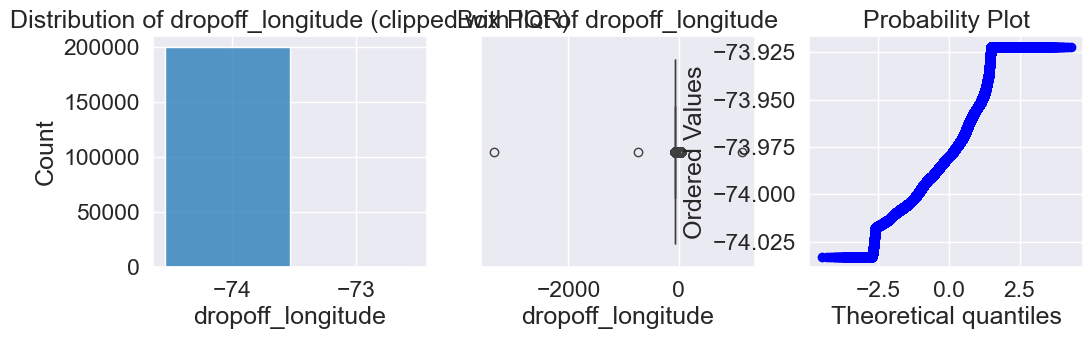


-------------------------------------------------

Feature: dropoff_latitude (dtype: float64)
Values in [-881.9855130000001; 872.6976279999999] -- missing: 1 (0.0005000000000032756%)
Mean: 39.92389040183263 +- 6.794828840545115
Percentile levels:    1%,    5%,   25%,   50%,   75%,   95%,   99%
Values:            0.00,  40.69,  40.73,  40.75,  40.77,  40.79,  40.83
Outliers using z-score (+-3): [19.54; 60.31] (1.94% flags, not normally distributed: p=nan)
Outliers using IQR (1.5): [40.68255683270264; 40.819267945495604] (6.07% flags)


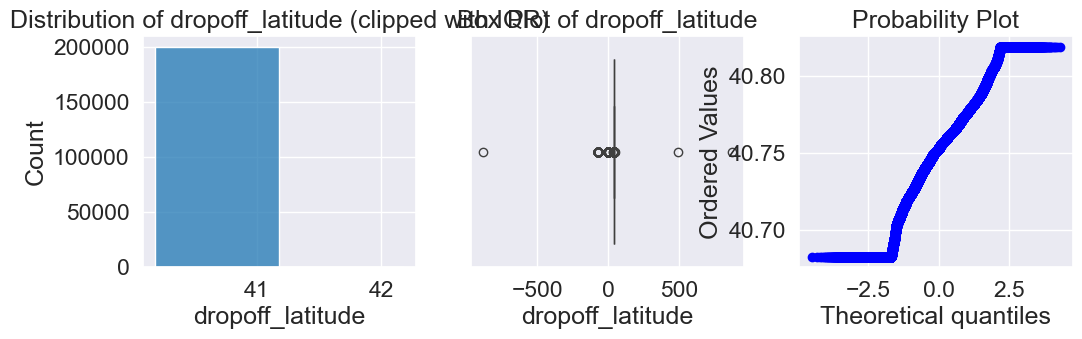


-------------------------------------------------

Feature: passenger_count (dtype: int64)
Values in [0.0; 208.0] -- missing: 0 (0.0%)
Mean: 1.684535 +- 1.3859965507558787
Percentile levels:    1%,    5%,   25%,   50%,   75%,   95%,   99%
Values:            1.00,   1.00,   1.00,   1.00,   2.00,   5.00,   6.00
Outliers using z-score (+-3): [-2.47; 5.84] (2.14% flags, not normally distributed: p=0.0)
Outliers using IQR (1.5): [-0.5; 3.5] (11.28% flags)


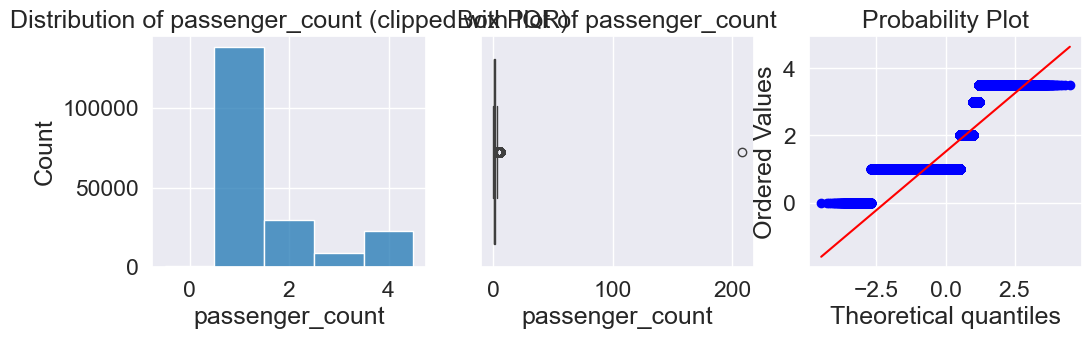


-------------------------------------------------

                 categ
count           200000
unique               3
top                  b
freq             66871
values       [a, b, c]
bottom               a
freq_bottom      66496
--------------------------------------------------
---------------CATEGORICAL FEATURES---------------
--------------------------------------------------
Feature: categ (dtype: category)
Values in ['a' 'b' 'c'] -- missing: 0 (0.0%)
Top: b (33.44%), bottom: a (33.25%)


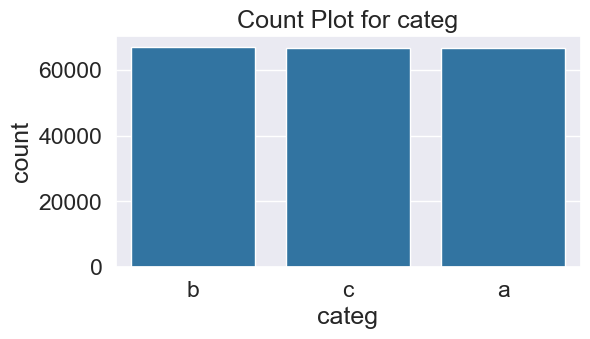

In [38]:
def plot_numerical_features(df, col, low, upp):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    axs = axs.flatten()
    
    # Clip the data
    clipped_data = df[col].clip(lower=low, upper=upp)
    sns.histplot(clipped_data, kde=False, discrete=True, ax=axs[0])
    axs[0].set_title(f'Distribution of {col} (clipped with IQR)')
    
    sns.boxplot(data=df, x=col, ax=axs[1])
    axs[1].set_title(f'Box Plot of {col}')
    

    stats.probplot(clipped_data, plot=axs[2])
    
    # Display the plot
    plt.show()
    
def plot_categorical_features(df, col):
    plt.figure(figsize=(6, 3))  # Adjust the figure size if needed
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if they are too long
    plt.show()

def describe_df(df, num_features, cat_features):
    percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
    n_rows = len(df)
    
    # Numerical features
    df_num = df[num_features]
    desc_num = df_num.describe(percentiles=percentiles)
    
    # z-score
    desc_num.loc['zm3'] = desc_num.loc['mean'] - 3 * desc_num.loc['std']
    desc_num.loc['zp3'] = desc_num.loc['mean'] + 3 * desc_num.loc['std']
    desc_num.loc['prop_outside_3std'] = ((df_num < desc_num.loc['zm3']) | (df_num > desc_num.loc['zp3'])).mean()
    
    normality_results = {}
    for col in df_num.columns:
        if pd.api.types.is_numeric_dtype(df_num[col]):
            stat, p_value = stats.normaltest(df_num[col])
            normality_results[col] = p_value  # p_value > 0.05 means null hypo. can't be rejected
    desc_num.loc['is_normal_dist'] = pd.Series(normality_results)
    
    # IQR
    iqr = desc_num.loc['75%'] - desc_num.loc['25%']
    desc_num.loc["iqrm"] = desc_num.loc['25%'] - 1.5 * iqr
    desc_num.loc["iqrp"] = desc_num.loc['75%'] + 1.5 * iqr
    desc_num.loc['prop_outside_iqr'] = ((df_num < desc_num.loc['iqrm']) | (df_num > desc_num.loc['iqrp'])).mean()
    

    print("--------------------------------------------------")
    print("----------------NUMERICAL FEATURES----------------")
    print("--------------------------------------------------")
    for col in df_num.columns:
        col_vals = desc_num.loc[:, col]
        values_line = ', '.join([f'{col_vals[f"{int(p*100)}%"]:>6.2f}' for p in percentiles])
        print(f"Feature: {col} (dtype: {df_num[col].dtype})")
        print(f"Values in [{col_vals['min']}; {col_vals['max']}] -- missing: {int(n_rows - col_vals['count'])} ({(1 - col_vals['count']/n_rows)* 100}%)")
        print(f"Mean: {col_vals['mean']} +- {col_vals['std']}")
        print(f"Percentile levels: {', '.join([f'{int(p*100):>4}%' for p in percentiles])}")
        print(f"Values:          {values_line}")
        print(f"Outliers using z-score (+-3): [{col_vals['zm3']:.2f}; {col_vals['zp3']:.2f}] ({col_vals['prop_outside_3std']* 100:.2f}% flags, {'normally distributed' if col_vals['is_normal_dist'] > 0.05 else 'not normally distributed'}: p={col_vals['is_normal_dist']})")
        print(f"Outliers using IQR (1.5): [{col_vals['iqrm']}; {col_vals['iqrp']}] ({col_vals['prop_outside_iqr']* 100:.2f}% flags)")

        plot_numerical_features(df_num, col, low=col_vals['iqrm'], upp=col_vals['iqrp'])

        print("\n-------------------------------------------------\n")

    # Catgeorical features
    df_cat = df[cat_features]
    desc_cat = df_cat.describe()
    desc_cat.loc["values"] = [df_cat[col].cat.categories.values for col in df_cat.columns]
    desc_cat.loc["bottom"] = df_cat.apply(lambda col: col.value_counts().idxmin())
    desc_cat.loc["freq_bottom"] = df[categorical_features].apply(lambda col: col.value_counts().min())
    print(desc_cat)
    print("--------------------------------------------------")
    print("---------------CATEGORICAL FEATURES---------------")
    print("--------------------------------------------------")
    for col in df_cat.columns:
        col_vals = desc_cat.loc[:, col]
        print(f"Feature: {col} (dtype: {df_cat[col].dtype})")
        print(f"Values in {col_vals['values']} -- missing: {int(n_rows - col_vals['count'])} ({(1 - col_vals['count']/n_rows)* 100}%)")
        print(f"Top: {col_vals['top']} ({col_vals['freq']/n_rows*100:.2f}%), bottom: {col_vals['bottom']} ({col_vals['freq_bottom']/n_rows*100:.2f}%)")
        
        plot_categorical_features(df_cat, col)
    
    return desc_num
_ = describe_df(df, numerical_features, categorical_features)

# drop row whenever one value has a Z-score outside -3:3
# df = df[(np.abs(stats.zscore(df[numerical_features)) < 3).all(axis=1)]

Several ways to deal with outliers:

1. **Deletion**: we can delete the outlier if it is because of some errors in the data collection process.
2. **Transformation**: we can use natural log, binning and other variable transformation methods to reduce the difference between outliers and other variables.
3. **Imputation**: if the outliers are artificial, instead of natural, we can use some statistical models to predict the values of outlier observation.
4. **Separate treatment**: if the number of outliers is large, and we cannot delete them, we should treat them separately.

Some ways to deal with missing values:

1. **Deletion**: deleting the data associated with missing values. We usually use the deletion method when the missing parts are completely at random.
2. **Imputation/Prediction**: when there are known relationships between samples, we can fill in the missing values with imputation or train a prediction model to predict the missing values. 

# 2. Multivariate analysis

## 2.1. Feature information

In [ ]:
def plot_bivariate_scatter(df, target_col, col):
    plt.figure(figsize=(6, 3))  # Adjust the figure size if needed
    sns.scatterplot(data=df, x=col, y=target_col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if they are too long
    plt.show()
    
def plot_bivariate_box(df, target_col, col):
    plt.figure(figsize=(6, 3))  # Adjust the figure size if needed
    sns.boxplot(data=df, x=col, y=target_col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if they are too long
    plt.show()

def bivariate_analysis(df, target_col, num_features, cat_features):
    
    print("--------------------------------------------------")
    print("----------------NUMERICAL FEATURES----------------")
    print("--------------------------------------------------")
    for col in num_features:
        if col != target_col:
            print(f"Target: {target_col} vs column: {col}")
            
            plot_bivariate_scatter(df, target_col, col)
            
            print("\n--------------------------------------------------\n")
    
    print("--------------------------------------------------")
    print("---------------CATEGORICAL FEATURES---------------")
    print("--------------------------------------------------")  
    for col in cat_features:
        print(f"Target: {target_col} vs column: {col}")
        
        plot_bivariate_box(df, target_col, col)
        
def plot_pairs(df, cols):
    sns.pairplot(df[cols], diag_kind=None)
    plt.show()
        
# bivariate_analysis(df, "fare_amount", numerical_features, categorical_features)
        
plot_pairs(df, ["fare_amount", "pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"])

# 3. Feature selection

Although it might not reduce the prediction performance of the model, collinearity may affect the estimated coefficients. This will undermine our understanding of feature significance since the coefficients can swing wildly based on the others. Some clues of collinearity:

1. Regression coefficient is not significant even though, theoretically, that variable should be highly correlated with target value Y.
2. Regression coefficients of other variables change drastically when adding or deleting variables.
3. Regression coefficient with an unintuitive sign.

To detect collinearity in features, **bivariate correlation coefficient** and **variation inflation factor** are the two main methods. Bi-variate correlation coefficient is more useful when we are interested in the collinearity between two variables and variance inflation factor is more useful when we are interested in the collinearity between multiple variables.

## 3.1. Correlation analysis 

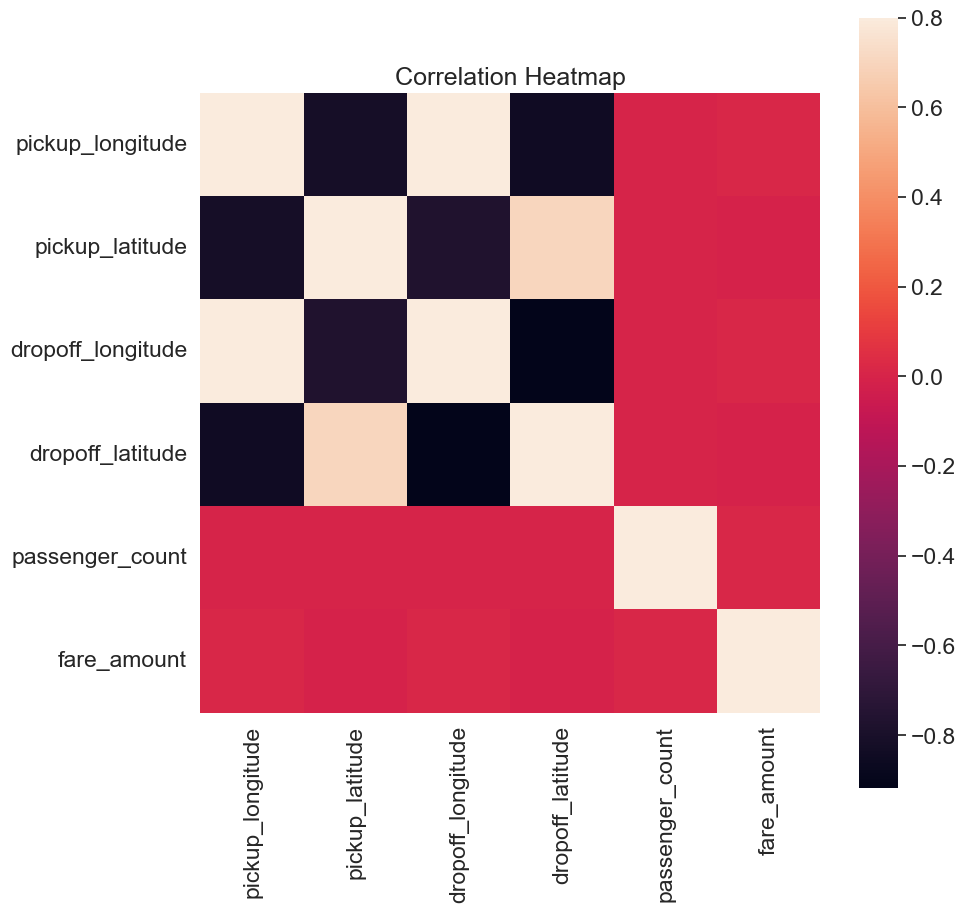

In [85]:
def plot_correlation_heatmap(df, num_features, vmax=0.8):

    plt.figure(figsize=(10, 10))
    corrmat = df[num_features].corr()
    sns.heatmap(corrmat, vmax=vmax, square=True)
    plt.title('Correlation Heatmap')
    plt.show()
    
plot_correlation_heatmap(df, numerical_features)

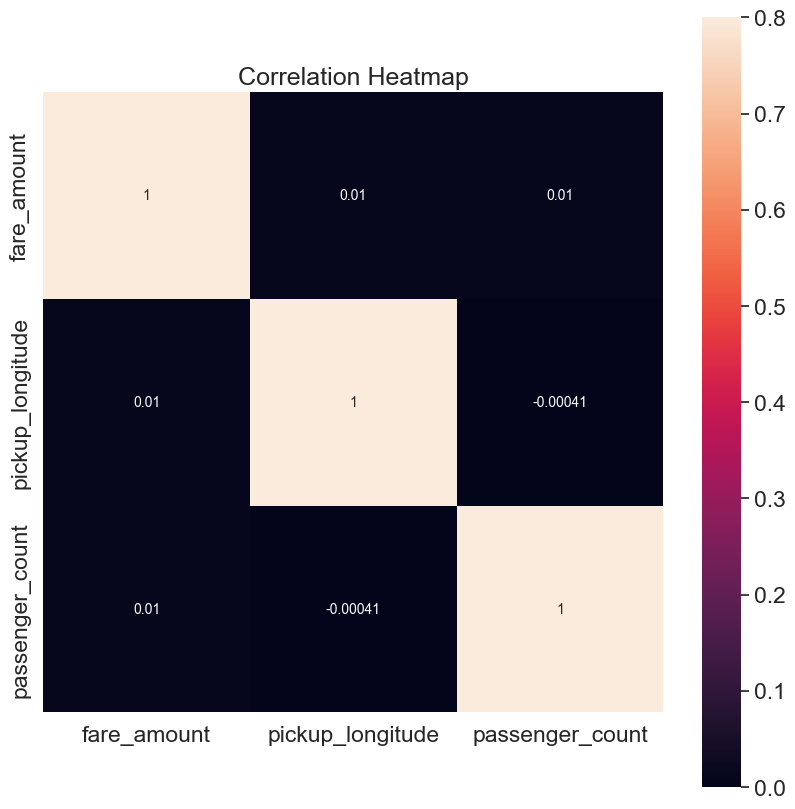

In [11]:
def plot_correlation_heatmap_top_features(df, k, target_col, num_features, vmax=0.8):

    plt.figure(figsize=(10, 10))
    corrmat = df[num_features].corr()
    cols = corrmat.nlargest(k, target_col)[target_col].index
    corrmat = np.corrcoef(df[cols].values.T)
    sns.heatmap(corrmat, vmax=vmax, square=True, annot=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap_top_features(df, 3, "fare_amount", numerical_features)

In [ ]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def cramers_v_heatmap(df, columns=None, figsize=(10, 8), annot=True, cmap="coolwarm"):
    """Create a heatmap of Cramér's V statistic for a DataFrame's categorical columns."""
    if columns is None:
        columns = df.columns

    # Filter the DataFrame to only include categorical columns
    cat_columns = df[columns].select_dtypes(include=['object', 'category']).columns

    # Initialize the correlation matrix
    n = len(cat_columns)
    cramers_v_matrix = np.zeros((n, n))

    # Calculate Cramér's V for each pair of categorical variables
    for i in range(n):
        for j in range(i, n):
            v = cramers_v(df[cat_columns[i]], df[cat_columns[j]])
            cramers_v_matrix[i, j] = v
            cramers_v_matrix[j, i] = v
    
    # Convert to a DataFrame for easier plotting
    cramers_v_df = pd.DataFrame(cramers_v_matrix, index=cat_columns, columns=cat_columns)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cramers_v_df, annot=annot, cmap=cmap, vmin=0, vmax=1)
    plt.title("Cramér's V Heatmap")
    plt.show()

categorical_features =  list(df.select_dtypes(include=["category", "bool"]).columns)
cramers_v_heatmap(df, columns=categorical_features)

## 3.2. Variance inflation factor

## 3.3. RFE

## 3.3. Dimensionality reduction (PCA/t-SNE/UMAP)

PCA is a dimensionality reduction method that geometrically projects high dimensions onto lower dimensions called principal components (PCs), with the goal of finding the best summary of the data using a limited number of principal components. The procedure for finding principal components is:

1. The first PC is chosen to minimize the reconstruction error between the data, which is the same as maximizing the variance of the projected data.
2. The next PCs are chosen in the same way, with the additional requirement that they must be linearly uncorrelated with (orthogonal to) all previous PCs.

t-SNE is another dimensionality reduction algorithm and can be useful for visualizing high dimensional data (Maaten, et al., 2008). Unlike PCA, t-SNE is a non-linear method. The basic idea of t-SNE is as follows:

1.Model probability distribution Pij (assumed to be Gaussian) on the original data
2. Model probability distribution Qij on the projected data
3. Find projected vectors by minimizing KL(P||Q) with gradient descent

t-SNE has a tunable parameter and therefore increases the complexity of the pipeline

# Features

# Model

## Linear regression


In [49]:
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(df.dropna()[["total_distance"]], df.dropna()["fare_amount"])
preds = lin_reg.predict(df.dropna()[["total_distance"]])
r2_score(df.dropna()["fare_amount"], preds)

0.1922792855169242

In [52]:
df[df["total_distance"]>100]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance
10942805,2011-02-14 16:29:32.0000001,10.5,2011-02-14 16:29:32+00:00,-73.980805,40.747867,-73.957898,39.608972,1,126.574818
33456163,2010-05-03 11:45:32.0000003,6.1,2010-05-03 11:45:32+00:00,-73.137393,41.366138,-74.006791,40.728763,1,101.613116
42806711,2011-02-05 02:20:22.0000001,17.7,2011-02-05 02:20:22+00:00,-74.004872,40.729857,-73.948185,39.604057,2,125.197275
1200661,2011-02-17 18:30:35.0000002,27.3,2011-02-17 18:30:35+00:00,-75.426904,40.774075,-73.971779,39.622013,1,177.883880
54700342,2011-03-04 19:06:05.0000004,6.1,2011-03-04 19:06:05+00:00,-73.978957,39.609707,-73.982416,40.768281,1,128.746953
2338554,2010-06-19 14:32:17.0000002,60.3,2010-06-19 14:32:17+00:00,-73.137393,41.366138,-74.177279,40.691147,2,115.001161
35004236,2011-05-28 07:49:41.0000003,17.3,2011-05-28 07:49:41+00:00,-73.967302,40.759383,-75.458979,39.653763,1,176.408255
5546445,2011-03-13 18:12:20.0000002,8.9,2011-03-13 18:12:20+00:00,-73.968131,40.765590,-73.972395,39.618371,2,127.485320
46892213,2011-04-19 08:22:44.0000003,9.7,2011-04-19 08:22:44+00:00,-73.974788,39.615142,-73.952094,40.769178,1,128.256758
38602843,2011-04-15 13:08:53.0000003,19.3,2011-04-15 13:08:53+00:00,-74.006697,40.705730,-73.949133,39.609582,1,121.907705


In [51]:
lin_reg.coef_

array([0.63406226])

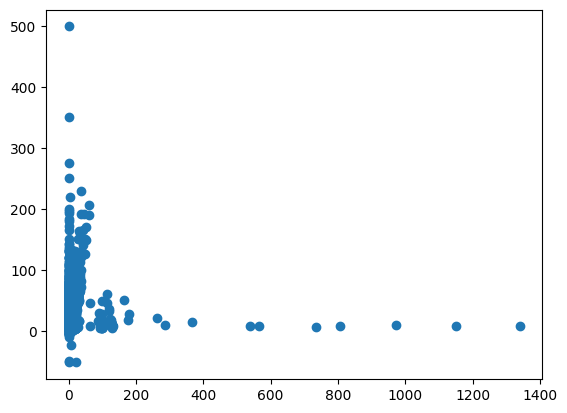

In [50]:
def evaluate_model(model, x_train, y_train, x_test, y_test, features_to_plot=None):
    print(f"Evaluating model ({model.__class__.__name__})")
    print(f"Coefficients: {model.coef_}, intercept: {model.intercept_}")
    
    preds_train = model.predict(x_train)
    preds_test = model.predict(x_test)
    print("--------------------------------------------------")
    print("-------------------TRAINING SET-------------------")
    print("--------------------------------------------------")
    print(f"R2: {round(r2_score(y_train, preds_train), 4)}")
    print(f"MSE: {round(mean_squared_error(y_train, preds_train), 4)}, RMSE: {round(np.sqrt(mean_squared_error(y_train, preds_train)), 4)}, MAE: {round(mean_absolute_error(y_train, preds_train), 4)}")
    
    print("--------------------------------------------------")
    print("-------------------TRAINING SET-------------------")
    print("--------------------------------------------------")
    print(f"R2: {round(r2_score(y_test, preds_test), 4)}")
    print(f"MSE: {round(mean_squared_error(y_test, preds_test), 4)}, RMSE: {round(np.sqrt(mean_squared_error(y_test, preds_test)), 4)}, MAE: {round(mean_absolute_error(y_test, preds_test), 4)}")
    
    print("--------------------------------------------------")
    print("------------------RESIDUAL PLOTS------------------")
    print("--------------------------------------------------")
    
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test, y=preds_test, alpha=0.7)
    plt.xlabel("Actual values (test)")
    plt.ylabel("Predicted values")
    plt.title("Pred. vs. actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
    plt.show()
    
    test_errors = y_test - preds_test
    
    plt.figure(figsize=(8, 4))
    sns.histplot(test_errors, bins=20, kde=True)
    plt.xlabel("Prediction Error (Testing Set)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Prediction Errors (Testing Set)")
    plt.show()
    
    if features_to_plot is not None:
        num_features = len(features_to_plot)
        fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features))
        
        for i, col in enumerate(features_to_plot):
            sns.scatterplot(x=x_test[col], y=y_test, ax=axes[i])
            axes[i].set_xlabel(f"{col} (Testing Set)")
            axes[i].set_ylabel("Target")
            axes[i].set_title(f"{col} vs Target (Testing Set)")
        
        plt.tight_layout()
        plt.show()
        
    